In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import gensim
import logging
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from keras.utils import np_utils
from tqdm import tqdm as t
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [2]:
train = pd.read_csv('en_train.csv')
test = pd.read_csv('en_test.csv')
output = pd.read_csv('output.csv')

In [3]:
sentences_id = train.sentence_id.tolist()
sentences_before = train.before.tolist()
sentences_after = train.after.tolist()
max_id = len(sentences_id)
sep_id = int(6*max_id/7)

In [4]:
text_before = []
test_before = []
for i in range(sep_id):
    text_before.append([])

In [15]:
clases = np.array(train.before == train.after, dtype = int)

In [17]:
text_class = []
test_class= []
for i in t(range(len(train))):
    sid = sentences_id[i]
    if i < sep_id:
        text_before[sid].append(str(sentences_before[i]))
        text_class.append(clases[i])
    else:
        test_before.append(str(sentences_before[i]))
        test_class.append(clases[i])

100%|██████████| 9918441/9918441 [00:08<00:00, 1217631.16it/s]


In [52]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = gensim.models.Word2Vec(text_before, size=500, window=5, min_count=0, workers=4, iter=15)
model.save('class.1.1')

2018-01-30 01:26:27,722 : INFO : collecting all words and their counts
2018-01-30 01:26:27,723 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-30 01:26:27,789 : INFO : PROGRESS: at sentence #10000, processed 624325 words, keeping 27049 word types
2018-01-30 01:26:27,864 : INFO : PROGRESS: at sentence #20000, processed 1242425 words, keeping 43741 word types
2018-01-30 01:26:27,936 : INFO : PROGRESS: at sentence #30000, processed 1866425 words, keeping 57658 word types
2018-01-30 01:26:27,998 : INFO : PROGRESS: at sentence #40000, processed 2372489 words, keeping 70029 word types
2018-01-30 01:26:28,063 : INFO : PROGRESS: at sentence #50000, processed 2879249 words, keeping 81429 word types
2018-01-30 01:26:28,132 : INFO : PROGRESS: at sentence #60000, processed 3388229 words, keeping 92177 word types
2018-01-30 01:26:28,200 : INFO : PROGRESS: at sentence #70000, processed 3896517 words, keeping 102015 word types
2018-01-30 01:26:28,267 : INFO : PROGRE

2018-01-30 01:26:32,659 : INFO : PROGRESS: at sentence #1410000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,663 : INFO : PROGRESS: at sentence #1420000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,666 : INFO : PROGRESS: at sentence #1430000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,669 : INFO : PROGRESS: at sentence #1440000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,672 : INFO : PROGRESS: at sentence #1450000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,676 : INFO : PROGRESS: at sentence #1460000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,679 : INFO : PROGRESS: at sentence #1470000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,683 : INFO : PROGRESS: at sentence #1480000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,686 : INFO : PROGRESS: at sentence #1490000,

2018-01-30 01:26:32,941 : INFO : PROGRESS: at sentence #2120000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,944 : INFO : PROGRESS: at sentence #2130000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,948 : INFO : PROGRESS: at sentence #2140000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,952 : INFO : PROGRESS: at sentence #2150000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,955 : INFO : PROGRESS: at sentence #2160000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,958 : INFO : PROGRESS: at sentence #2170000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,961 : INFO : PROGRESS: at sentence #2180000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,965 : INFO : PROGRESS: at sentence #2190000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:32,969 : INFO : PROGRESS: at sentence #2200000,

2018-01-30 01:26:33,189 : INFO : PROGRESS: at sentence #2830000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,193 : INFO : PROGRESS: at sentence #2840000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,197 : INFO : PROGRESS: at sentence #2850000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,201 : INFO : PROGRESS: at sentence #2860000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,204 : INFO : PROGRESS: at sentence #2870000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,207 : INFO : PROGRESS: at sentence #2880000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,210 : INFO : PROGRESS: at sentence #2890000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,214 : INFO : PROGRESS: at sentence #2900000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,217 : INFO : PROGRESS: at sentence #2910000,

2018-01-30 01:26:33,700 : INFO : PROGRESS: at sentence #4240000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,704 : INFO : PROGRESS: at sentence #4250000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,708 : INFO : PROGRESS: at sentence #4260000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,711 : INFO : PROGRESS: at sentence #4270000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,716 : INFO : PROGRESS: at sentence #4280000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,719 : INFO : PROGRESS: at sentence #4290000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,723 : INFO : PROGRESS: at sentence #4300000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,727 : INFO : PROGRESS: at sentence #4310000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,730 : INFO : PROGRESS: at sentence #4320000,

2018-01-30 01:26:33,947 : INFO : PROGRESS: at sentence #4950000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,951 : INFO : PROGRESS: at sentence #4960000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,954 : INFO : PROGRESS: at sentence #4970000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,957 : INFO : PROGRESS: at sentence #4980000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,961 : INFO : PROGRESS: at sentence #4990000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,965 : INFO : PROGRESS: at sentence #5000000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,968 : INFO : PROGRESS: at sentence #5010000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,971 : INFO : PROGRESS: at sentence #5020000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:33,974 : INFO : PROGRESS: at sentence #5030000,

2018-01-30 01:26:34,198 : INFO : PROGRESS: at sentence #5660000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,202 : INFO : PROGRESS: at sentence #5670000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,205 : INFO : PROGRESS: at sentence #5680000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,209 : INFO : PROGRESS: at sentence #5690000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,213 : INFO : PROGRESS: at sentence #5700000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,217 : INFO : PROGRESS: at sentence #5710000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,220 : INFO : PROGRESS: at sentence #5720000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,224 : INFO : PROGRESS: at sentence #5730000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,227 : INFO : PROGRESS: at sentence #5740000,

2018-01-30 01:26:34,493 : INFO : PROGRESS: at sentence #6370000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,497 : INFO : PROGRESS: at sentence #6380000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,501 : INFO : PROGRESS: at sentence #6390000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,505 : INFO : PROGRESS: at sentence #6400000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,509 : INFO : PROGRESS: at sentence #6410000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,513 : INFO : PROGRESS: at sentence #6420000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,517 : INFO : PROGRESS: at sentence #6430000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,520 : INFO : PROGRESS: at sentence #6440000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,524 : INFO : PROGRESS: at sentence #6450000,

2018-01-30 01:26:34,775 : INFO : PROGRESS: at sentence #7080000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,779 : INFO : PROGRESS: at sentence #7090000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,782 : INFO : PROGRESS: at sentence #7100000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,786 : INFO : PROGRESS: at sentence #7110000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,789 : INFO : PROGRESS: at sentence #7120000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,793 : INFO : PROGRESS: at sentence #7130000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,796 : INFO : PROGRESS: at sentence #7140000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,800 : INFO : PROGRESS: at sentence #7150000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:34,804 : INFO : PROGRESS: at sentence #7160000,

2018-01-30 01:26:35,341 : INFO : PROGRESS: at sentence #8490000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:35,345 : INFO : PROGRESS: at sentence #8500000, processed 29716240 words, keeping 486443 word types
2018-01-30 01:26:35,346 : INFO : collected 486443 word types from a corpus of 29716240 raw words and 8501520 sentences
2018-01-30 01:26:35,346 : INFO : Loading a fresh vocabulary
2018-01-30 01:26:36,413 : INFO : min_count=0 retains 486443 unique words (100% of original 486443, drops 0)
2018-01-30 01:26:36,413 : INFO : min_count=0 leaves 29716240 word corpus (100% of original 29716240, drops 0)
2018-01-30 01:26:37,607 : INFO : deleting the raw counts dictionary of 486443 items
2018-01-30 01:26:37,618 : INFO : sample=0.001 downsamples 26 most-common words
2018-01-30 01:26:37,618 : INFO : downsampling leaves estimated 21766129 word corpus (73.2% of prior 29716240)
2018-01-30 01:26:37,619 : INFO : estimated required memory for 486443 words and 500 dimensions: 

2018-01-30 01:28:08,811 : INFO : PROGRESS: at 13.48% examples, 602945 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:09,811 : INFO : PROGRESS: at 13.50% examples, 604559 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:10,814 : INFO : PROGRESS: at 13.51% examples, 605851 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:11,818 : INFO : PROGRESS: at 13.53% examples, 607295 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:12,822 : INFO : PROGRESS: at 13.55% examples, 608975 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:13,823 : INFO : PROGRESS: at 13.57% examples, 610268 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:14,833 : INFO : PROGRESS: at 13.59% examples, 611561 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:15,836 : INFO : PROGRESS: at 13.61% examples, 613186 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:16,847 : INFO : PROGRESS: at 13.63% examples, 614501 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:28:17,853 : INFO : PROGRESS: at 13.65% examples, 616134 wor

2018-01-30 01:29:40,736 : INFO : PROGRESS: at 27.25% examples, 624261 words/s, in_qsize 1, out_qsize 0
2018-01-30 01:29:47,090 : INFO : PROGRESS: at 27.25% examples, 602544 words/s, in_qsize 6, out_qsize 2
2018-01-30 01:29:48,095 : INFO : PROGRESS: at 33.34% examples, 602028 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:29:49,097 : INFO : PROGRESS: at 33.36% examples, 603123 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:29:50,100 : INFO : PROGRESS: at 33.37% examples, 604112 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:29:51,103 : INFO : PROGRESS: at 33.39% examples, 605100 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:29:52,104 : INFO : PROGRESS: at 33.41% examples, 606050 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:29:53,109 : INFO : PROGRESS: at 33.43% examples, 606938 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:29:54,118 : INFO : PROGRESS: at 33.45% examples, 607790 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:29:55,119 : INFO : PROGRESS: at 33.47% examples, 608667 wor

2018-01-30 01:31:18,590 : INFO : PROGRESS: at 47.07% examples, 618625 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:31:19,590 : INFO : PROGRESS: at 47.09% examples, 619203 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:31:20,596 : INFO : PROGRESS: at 47.11% examples, 619731 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:31:21,599 : INFO : PROGRESS: at 47.13% examples, 620286 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:31:22,600 : INFO : PROGRESS: at 47.15% examples, 620843 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:31:23,603 : INFO : PROGRESS: at 47.18% examples, 621310 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:31:24,606 : INFO : PROGRESS: at 47.20% examples, 621648 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:31:25,618 : INFO : PROGRESS: at 47.23% examples, 622070 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:31:32,552 : INFO : PROGRESS: at 47.25% examples, 608679 words/s, in_qsize 6, out_qsize 1
2018-01-30 01:31:33,559 : INFO : PROGRESS: at 53.34% examples, 607943 wor

2018-01-30 01:32:56,143 : INFO : PROGRESS: at 66.86% examples, 610631 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:32:57,151 : INFO : PROGRESS: at 66.88% examples, 611023 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:32:58,153 : INFO : PROGRESS: at 66.90% examples, 611419 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:32:59,162 : INFO : PROGRESS: at 66.92% examples, 611785 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:33:00,173 : INFO : PROGRESS: at 66.94% examples, 612120 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:33:01,179 : INFO : PROGRESS: at 66.96% examples, 612525 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:33:02,182 : INFO : PROGRESS: at 66.98% examples, 612912 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:33:03,183 : INFO : PROGRESS: at 67.00% examples, 613299 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:33:04,185 : INFO : PROGRESS: at 67.02% examples, 613704 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:33:05,187 : INFO : PROGRESS: at 67.04% examples, 614127 wor

2018-01-30 01:34:33,314 : INFO : PROGRESS: at 86.67% examples, 606975 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:34,318 : INFO : PROGRESS: at 86.69% examples, 607327 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:35,324 : INFO : PROGRESS: at 86.70% examples, 607703 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:36,330 : INFO : PROGRESS: at 86.72% examples, 608094 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:37,340 : INFO : PROGRESS: at 86.74% examples, 608419 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:38,342 : INFO : PROGRESS: at 86.76% examples, 608752 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:39,346 : INFO : PROGRESS: at 86.78% examples, 609064 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:40,350 : INFO : PROGRESS: at 86.80% examples, 609405 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:41,363 : INFO : PROGRESS: at 86.82% examples, 609721 words/s, in_qsize 7, out_qsize 0
2018-01-30 01:34:42,364 : INFO : PROGRESS: at 86.84% examples, 610051 wor

/home/miguel/env/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


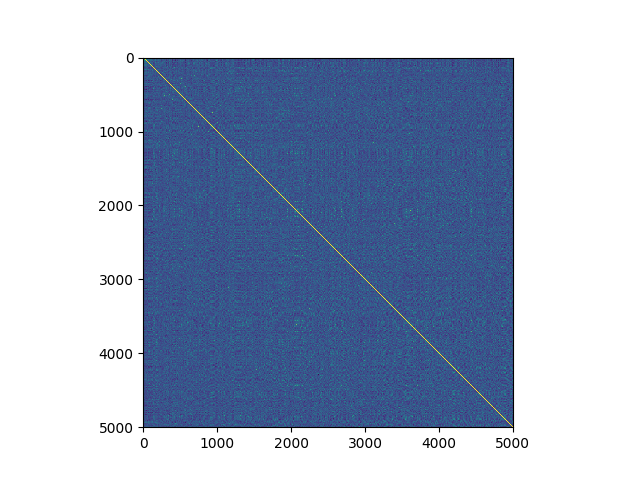

In [53]:
vocab = set(model.wv.vocab)
ordered_pairs = sorted([(i, model.wv.vocab[i].count) for i in vocab], key = lambda x: x[1], reverse = True)
ordered_voc = np.array([i[0] for i in ordered_pairs])
emb_matrix = np.array([model[i] for i in ordered_voc[:5000]])
M = normalize(emb_matrix)
MM = M@(M.T)
plt.imshow(MM)

In [34]:
num = 10000
vectors = []
for i in range(num):
    a = model.wv[sentences_before[i]]
    vectors.append(a)

classes = text_class[0:num]

In [46]:
model2 = Sequential()
model2.add(Dense(150, input_dim=500))
model2.add(Activation('relu'))
model2.add(Dropout(0.4))
model2.add(Dense(150))
model2.add(Activation('relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [48]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
nvectors = np.array(vectors)
nclasses = np.array(classes)

In [54]:
model2.fit(nvectors, nclasses, epochs=25, batch_size=250, verbose=2, validation_split=0.15)

Train on 8500 samples, validate on 1500 samples
Epoch 1/25
 - 0s - loss: 0.0302 - acc: 0.9884 - val_loss: 0.0928 - val_acc: 0.9727
Epoch 2/25
 - 0s - loss: 0.0292 - acc: 0.9887 - val_loss: 0.0913 - val_acc: 0.9713
Epoch 3/25
 - 0s - loss: 0.0287 - acc: 0.9880 - val_loss: 0.0884 - val_acc: 0.9707
Epoch 4/25
 - 0s - loss: 0.0263 - acc: 0.9899 - val_loss: 0.0913 - val_acc: 0.9720
Epoch 5/25
 - 0s - loss: 0.0240 - acc: 0.9909 - val_loss: 0.1018 - val_acc: 0.9727
Epoch 6/25
 - 0s - loss: 0.0227 - acc: 0.9913 - val_loss: 0.1016 - val_acc: 0.9713
Epoch 7/25
 - 0s - loss: 0.0207 - acc: 0.9920 - val_loss: 0.0958 - val_acc: 0.9713
Epoch 8/25
 - 0s - loss: 0.0217 - acc: 0.9913 - val_loss: 0.1007 - val_acc: 0.9733
Epoch 9/25
 - 0s - loss: 0.0198 - acc: 0.9924 - val_loss: 0.1081 - val_acc: 0.9727
Epoch 10/25
 - 0s - loss: 0.0206 - acc: 0.9926 - val_loss: 0.0979 - val_acc: 0.9727
Epoch 11/25
 - 0s - loss: 0.0173 - acc: 0.9947 - val_loss: 0.1086 - val_acc: 0.9720
Epoch 12/25
 - 0s - loss: 0.0157 - ac

In [50]:
num = 100000
fallos = 0
ini = len(text_class)
tvectors = []
tclasses = []
for i in t(range(num)):
    word = test[i]
    if word in model.wv.vocab:
        a = model.wv[word]
        tvectors.append(a)
        tclasses.append(test_class[i])
    else:
        if test_class[i][11] != 1:
            fallos = fallos+1

100%|██████████| 100000/100000 [00:00<00:00, 352927.85it/s]


In [51]:
ntvectors = np.array(tvectors)
ntclasses = np.array(tclasses)

In [55]:
score = model2.evaluate(ntvectors, ntclasses, batch_size=100)

100000/100000 [==============================] - 1s 10us/step


In [56]:
score

[0.1350880108239726, 0.9722100069522858]

In [168]:
lista = list(encoded_Y)
for i in range(16):
    print("De la clase numero " + str(i) + " hay " + str(lista.count(i)) + " palabras")

De la clase numero 0 hay 522 palabras
De la clase numero 1 hay 133744 palabras
De la clase numero 2 hay 258348 palabras
De la clase numero 3 hay 9821 palabras
De la clase numero 4 hay 5442 palabras
De la clase numero 5 hay 5162 palabras
De la clase numero 6 hay 1196 palabras
De la clase numero 7 hay 152795 palabras
De la clase numero 8 hay 14783 palabras
De la clase numero 9 hay 6128 palabras
De la clase numero 10 hay 12703 palabras
De la clase numero 11 hay 7353693 palabras
De la clase numero 12 hay 1880507 palabras
De la clase numero 13 hay 4024 palabras
De la clase numero 14 hay 1465 palabras
De la clase numero 15 hay 78108 palabras


In [19]:
model = gensim.models.Word2Vec.load('class.1.1')

In [33]:
model.wv.most_similar("fauna")

[('flora', 0.7101011872291565),
 ('biodiversity', 0.532404899597168),
 ('lagoons', 0.530567467212677),
 ('mammals', 0.5296938419342041),
 ('molluscs', 0.5285625457763672),
 ('fishes', 0.5283452868461609),
 ('reptiles', 0.5283380150794983),
 ('ecosystems', 0.5239874124526978),
 ('vertebrate', 0.49528414011001587),
 ('lizards', 0.49252399802207947)]